In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from math import sqrt

# Discrete kansvariabelen

Verwachtingswaarde: $E[X] = 3.3100$
Variantie: $Var(X)=3.0139$
Standaardafwijking: $\sigma=1.7361$
P(X = 2) = 0.170
P(X <= 2) = 0.340
P(X >= 2) = 0.830


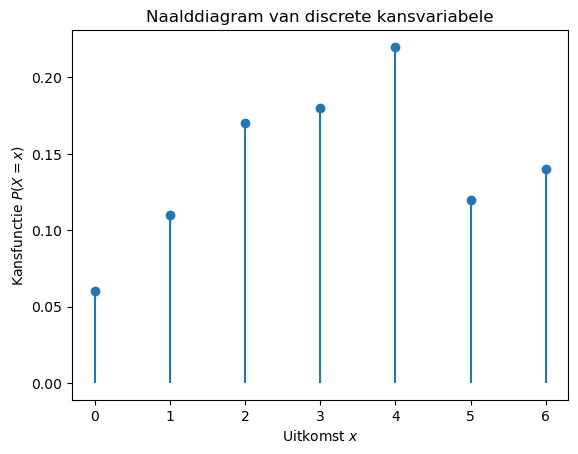

In [13]:
def draw_stem_plot(outcomes, probabilities, filename="test.pdf"):
    # Check if the probabilities add up to 1
    if sum(probabilities) != 1:
        raise ValueError("The probabilities should add up to 1")

    plt.stem(outcomes, probabilities, basefmt=" ")
    plt.xlabel("Uitkomst $x$")
    plt.ylabel("Kansfunctie $P(X = x)$")
    plt.title("Naalddiagram van discrete kansvariabele")
    plt.savefig(filename)

def compute_expected_value(probability_dict):
    return sum(k * v for (k, v) in probability_dict.items())

def compute_variance(probability_dict):
    mean = compute_expected_value(probability_dict)
    return sum((k - mean) ** 2 * v for (k, v) in probability_dict.items())

def compute_standard_deviation(probability_dict):
    variance = compute_variance(probability_dict)
    return sqrt(variance)

# --- Extra kansberekeningen ---
def P_equals(probability_dict, k):
    """Kans dat X exact k is"""
    if k in probability_dict:
        return probability_dict[k]
    else:
        return 0.0

def P_leq(probability_dict, k):
    """Kans dat X <= k"""
    prob = 0
    for key in probability_dict:
        if key <= k:
            prob += probability_dict[key]
    return prob

def P_geq(probability_dict, k):
    """Kans dat X >= k"""
    prob = 0
    for key in probability_dict:
        if key >= k:
            prob += probability_dict[key]
    return prob

# Voorbeeld: aantal bloedunits per soldaat
outcomes = [0, 1, 2, 3, 4, 5, 6]
probabilities = [0.06, 0.11, 0.17, 0.18, 0.22, 0.12, 0.14]
probability_dict = {k: v for (k, v) in zip(outcomes, probabilities)}


# --- Verwachtingswaarde en standaardafwijking ---
expected_value = compute_expected_value(probability_dict)
variance = compute_variance(probability_dict)
std_dev = compute_standard_deviation(probability_dict)

print(f"Verwachtingswaarde: $E[X] = {expected_value:.4f}$")
print(f"Variantie: $Var(X)={variance:.4f}$")
print(f"Standaardafwijking: $\\sigma={std_dev:.4f}$")

k = 2
print(f"P(X = {k}) = {P_equals(probability_dict, k):.3f}")
print(f"P(X <= {k}) = {P_leq(probability_dict, k):.3f}")
print(f"P(X >= {k}) = {P_geq(probability_dict, k):.3f}")

draw_stem_plot(outcomes, probabilities, filename="exam20251017_1a.pdf")